In [ ]:
pip install nltk

In [ ]:
pip install pandasql

In [29]:
import pandas as pd
import numpy as np
import json
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.corpus import stopwords
from collections import Counter

In [30]:
business_df = pd.read_json('yelp_business.json',lines=True)

In [31]:
coffee_df = business_df[business_df['categories'].str.contains('Coffee')==True]

In [32]:
review_df = pd.read_json('yelp_review.json',lines=True)

In [33]:
coffee_review_df = pd.merge(coffee_df, review_df, how='inner', left_on='business_id', right_on='business_id')
coffee_review_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444686,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",GgUyYrW9NgqRxgbR-iRv_A,P2FzNMi1ny1CBCsX591Egg,5,5,0,1,The coffee here is delicious and I love the at...,2016-11-08 00:02:30
444687,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",tNDn3dD4XQ0me6DaDWPgOw,Ay1lQmdy-kFLJuuV7gx1Iw,5,1,0,1,If you ever find yourself in Tucson wanting a ...,2021-11-09 19:54:44
444688,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",IEBqOU967RCgzypFUoBXcw,xfSiMtuhrlZNszvU2q_bCQ,5,0,0,0,"I meet my friends, sit outside at the tables, ...",2021-11-19 01:06:00
444689,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,"Specialty Food, Food, Coffee & Tea, Coffee Roa...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-14:0', '...",5s4Lz9XSviVshyzEw-KYwg,MBBx6MtDr2CC2TPpoypQnA,5,2,0,1,"Great coffee, and fun to stay and get a Frenc...",2021-03-05 20:27:34


In [34]:
coffee_review_df=coffee_review_df[['business_id','stars_y','text','date']]

In [35]:
coffee_review_df.dtypes

business_id            object
stars_y                 int64
text                   object
date           datetime64[ns]
dtype: object

In [36]:
coffee_review_df=coffee_review_df[(coffee_review_df['date']>'2006-12-31')&(coffee_review_df['date']<'2019-01-01')]

In [37]:
coffee_review_df['date'].max()

Timestamp('2018-12-31 23:58:45')

In [38]:
review_freq_month = pysqldf("SELECT strftime('%m', date) as month, count(*) as count, avg(stars_y) as avg_stars from coffee_review_df group by month")
review_freq_year = pysqldf("SELECT strftime('%Y', date) as year, count(*) as count from coffee_review_df group by year")
review_freq_hour = pysqldf("SELECT strftime('%H', date) as hour, count(*) as count from coffee_review_df group by hour")
review_freq_month

,month,count,avg_stars
0,01,23641,3.948606
1,02,22181,3.936162
2,03,25811,3.930960
3,04,24979,3.934705
4,05,25734,3.903979
5,06,25634,3.915542
6,07,28647,3.929731
7,08,27739,3.900032
8,09,24953,3.884503
9,10,25499,3.867171


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

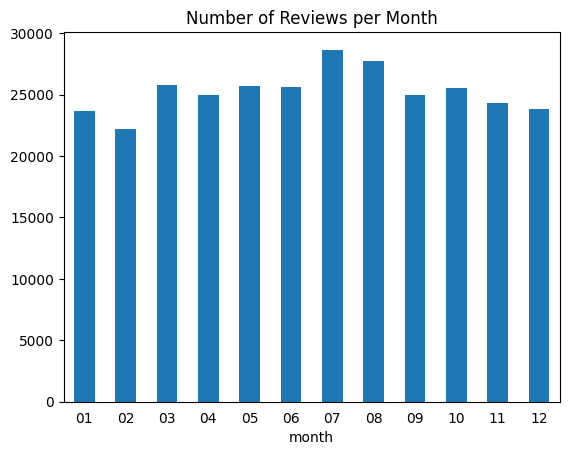

In [39]:
ax= review_freq_month.plot.bar(x='month',y='count')
ax.get_legend().remove()
plt.title('Number of Reviews per Month')
plt.tick_params(bottom=False)
plt.xticks(rotation = 0)

(10000.0, 30000.0)

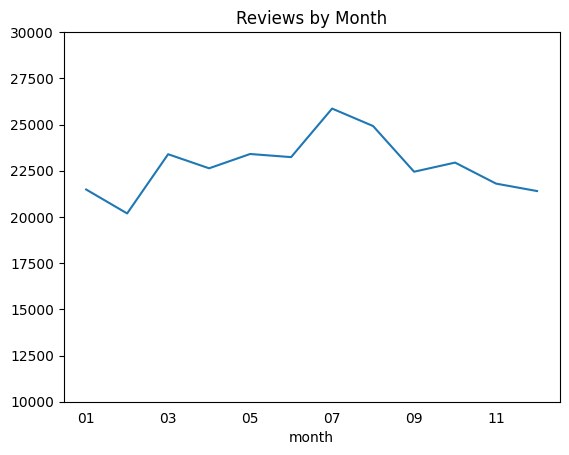

In [27]:
ax= review_freq_month.plot.line(x='month',y='count')
ax.get_legend().remove()
plt.title('Reviews by Month')
plt.tick_params(bottom=False)
plt.xticks(rotation = 0)
ax.set_ylim(10000,30000)

array([[<AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'avg_stars'}>]], dtype=object)

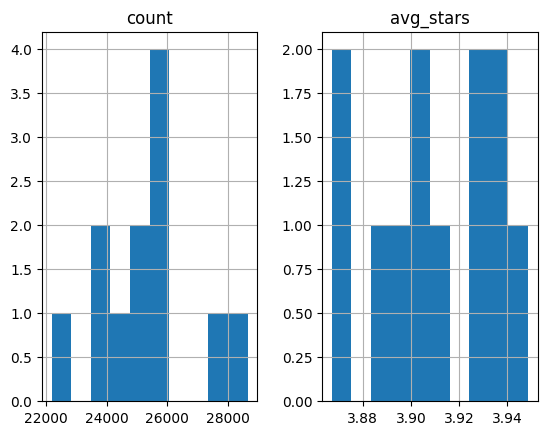

In [14]:
review_freq_month.set_index('month').hist()

In [ ]:
coffee_review_df['month']=coffee_review_df['date'].dt.month

In [ ]:
coffee_review_df.month.hist()